In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [88]:
# load dataset
data = pd.read_csv("/home/developer/Downloads/Gestational Diabetes.csv")

In [89]:
data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [90]:
data.describe()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,30.357708,2.517787,72.988142,158.154150,29.256818,0.226285,0.214427
std,7.022960,1.530656,12.552712,7.367421,5.092321,0.418632,0.410627
min,16.000000,1.000000,43.000000,135.000000,16.000000,0.000000,0.000000
25%,24.000000,1.000000,64.750000,153.000000,25.700000,0.000000,0.000000
50%,30.000000,2.000000,70.000000,158.000000,28.900000,0.000000,0.000000
75%,36.000000,3.000000,80.000000,164.000000,32.000000,0.000000,0.000000
max,45.000000,9.000000,126.000000,196.000000,54.300000,1.000000,1.000000


In [91]:
data.shape

(1012, 7)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


In [93]:
# get null values
data.isnull().sum()

Age             0
Pregnancy No    0
Weight          0
Height          0
BMI             0
Heredity        0
Prediction      0
dtype: int64

In [94]:
# get duplicates
data.duplicated().sum()

94

In [95]:
# drop duplicates
data.drop_duplicates(inplace=True)

In [96]:
data.shape

(918, 7)

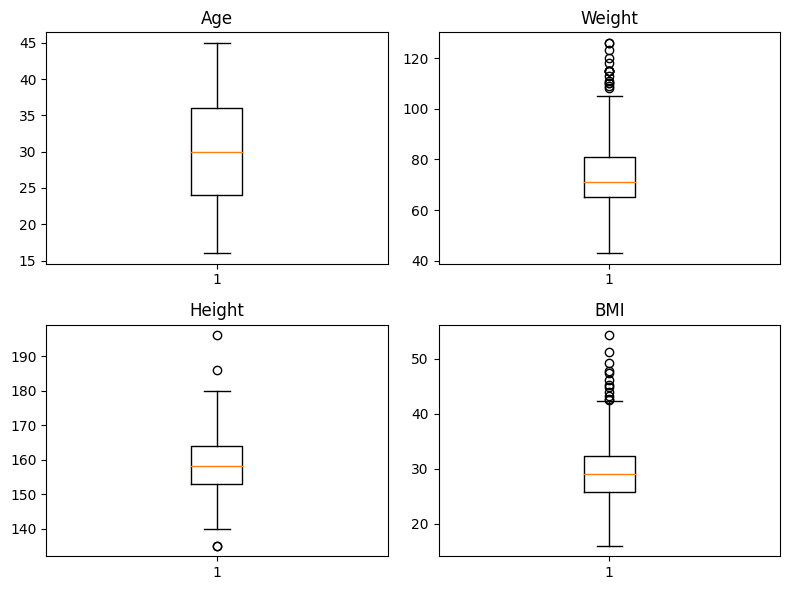

In [97]:
# get outliers

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot the first box plot (Age) in the first subplot
axes[0, 0].boxplot(data['Age'])
axes[0, 0].set_title('Age')

# Plot the second box plot (Weight) in the second subplot
axes[0, 1].boxplot(data['Weight'])
axes[0, 1].set_title('Weight')

# Plot the third box plot (Height) in the third subplot
axes[1, 0].boxplot(data['Height'])
axes[1, 0].set_title('Height')

# Plot the fourth box plot (BMI) in the fourth subplot
axes[1, 1].boxplot(data['BMI'])
axes[1, 1].set_title('BMI')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [98]:
# remove outliers
def remove_outliers(col, df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  

data = remove_outliers('Age', data)
data = remove_outliers('Weight', data)
data = remove_outliers('Height', data)
data = remove_outliers('BMI', data)

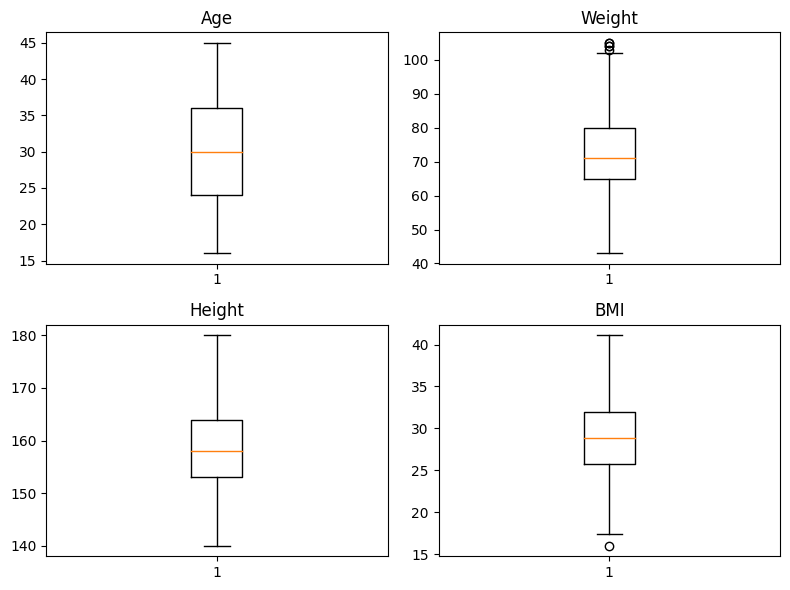

In [99]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot the first box plot (Age) in the first subplot
axes[0, 0].boxplot(data['Age'])
axes[0, 0].set_title('Age')

# Plot the second box plot (Weight) in the second subplot
axes[0, 1].boxplot(data['Weight'])
axes[0, 1].set_title('Weight')

# Plot the third box plot (Height) in the third subplot
axes[1, 0].boxplot(data['Height'])
axes[1, 0].set_title('Height')

# Plot the fourth box plot (BMI) in the fourth subplot
axes[1, 1].boxplot(data['BMI'])
axes[1, 1].set_title('BMI')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

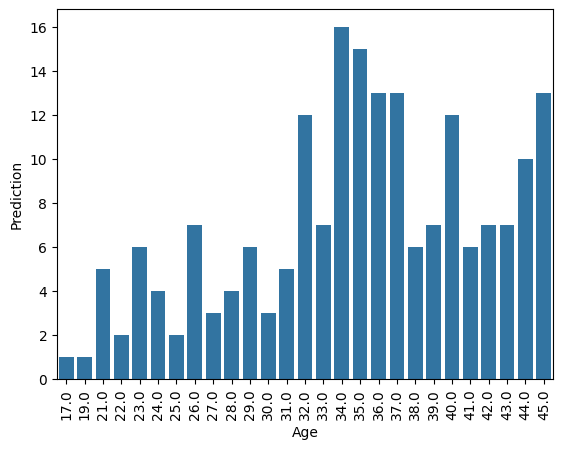

In [100]:
# plot bar plot get diabetes positive in the perticuler age
df=data[data['Prediction']==1].groupby('Age').sum()
sns.barplot(data=df, x='Age', y="Prediction")
plt.xticks(rotation='vertical')
plt.show()

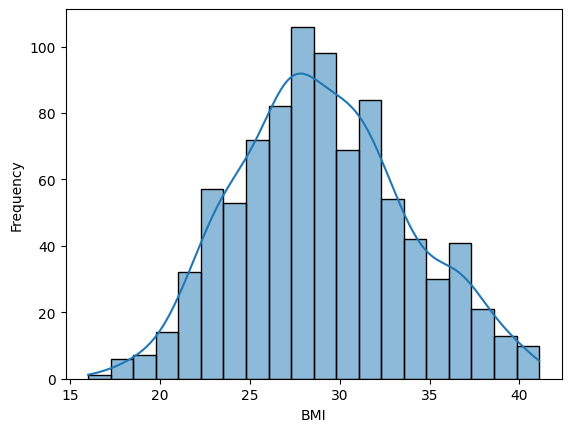

In [101]:
sns.histplot(data['BMI'], kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [102]:
data.columns

Index(['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity',
       'Prediction'],
      dtype='object')

<Axes: >

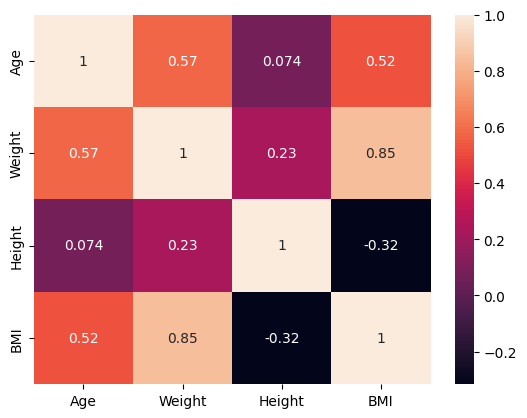

In [103]:
# Calculate the correlation between 'Age', 'Weight', 'Height', and 'BMI'. Which pair of variables are most strongly correlated??
corr_relations = data[['Age', 'Weight', 'Height', 'BMI']].corr()
sns.heatmap(corr_relations, annot=True)

In [104]:
# Filter the dataset to show records where the 'Age' is above 30 and the 'BMI' is greater than 25.
data[(data['Age'] > 30) & (data['BMI'] > 25)]

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
146,31.0,1.0,69.0,165.0,25.3,0,0
149,32.0,1.0,69.0,165.0,25.3,0,0
159,31.0,1.0,73.0,155.0,30.4,0,0
161,31.0,1.0,71.0,154.0,29.9,0,0
162,32.0,1.0,70.0,146.0,32.8,0,0
...,...,...,...,...,...,...,...
1005,37.0,2.0,92.0,157.0,37.3,0,1
1006,34.0,3.0,90.0,155.0,37.5,0,0
1007,35.0,3.0,89.0,159.0,35.2,1,1
1008,41.0,4.0,87.0,165.0,32.0,0,0


In [105]:
# Find all records where 'Heredity' is 'Yes' and the 'Prediction' is 'High Risk'.
df=data[data['Heredity'] == 1].groupby('Prediction').count()
df

,Age,Pregnancy No,Weight,Height,BMI,Heredity
Prediction,,,,,,
0,88,88,88,88,88,88
1,120,120,120,120,120,120


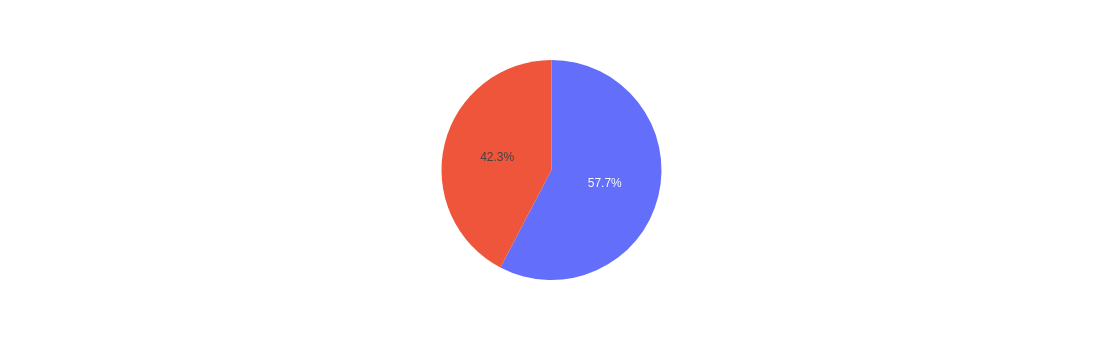

In [106]:
fig = px.pie(values=df['Heredity'], hole=0.0)

# Show the chart
fig.show()

In [107]:
# Group the dataset by 'Heredity' and calculate the average 'Age' and 'BMI' for each group.
data.groupby('Heredity')[['Age', 'BMI']].mean()

,Age,BMI
Heredity,,
0,29.491228,28.185234
1,33.413462,31.883173


In [108]:
# What is the total number of pregnancies ('Pregnancy No') for each 'Prediction' category?
total_pregnancies = data.groupby('Prediction')['Pregnancy No'].sum()
total_pregnancies

Prediction
0    1609.0
1     654.0
Name: Pregnancy No, dtype: float64

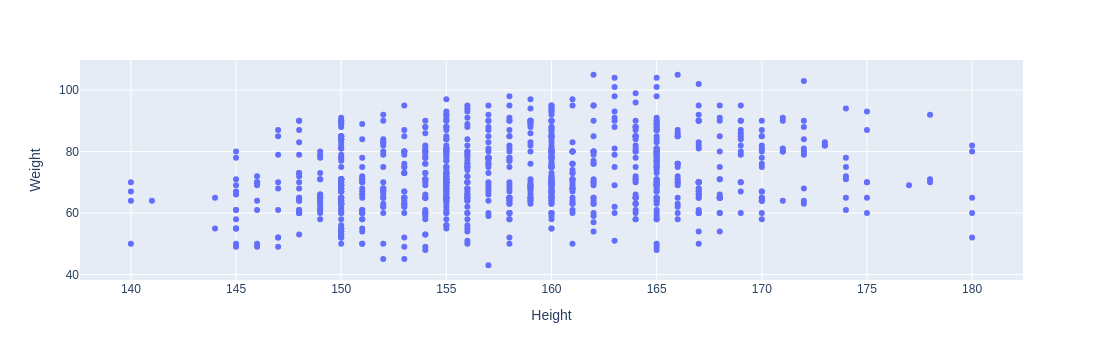

In [109]:
# Create a scatter plot of 'Height' vs 'Weight', color-coded by 'Prediction'. What insights can you derive?
# px.scatter(x=data['Height'], y=data['Weight'], hue='Prediction')
# plt.show()
fig = px.scatter(
    x=data['Height'],
    y=data['Weight'],
    labels={'x': 'Height', 'y': 'Weight'}
)
# Show the plot
fig.show()

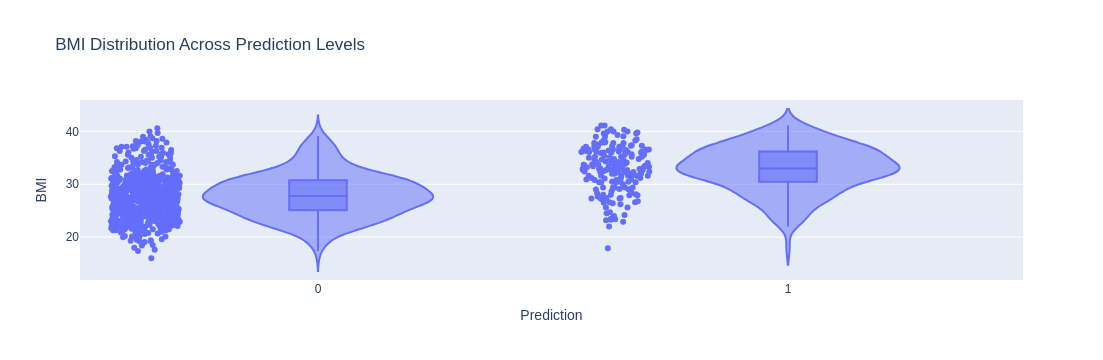

In [110]:
# Plot a violin plot for 'BMI' grouped by 'Prediction'. What does the distribution look like across different prediction levels?
fig = px.violin(data, x='Prediction', y='BMI', box=True, points="all", title="BMI Distribution Across Prediction Levels")

# Show the plot
fig.show()

In [116]:
# Create a new column called 'Age Group' that categorizes individuals into 'Young', 'Middle-aged', and 'Senior' based on their age.
def add_new_column(col):
    if col <= 25:
        return 'Young'
    elif 25 < col < 35:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the function to the 'Age' column and create a new column 'Age Group'
data['Age Group'] = data['Age'].map(add_new_column)

In [112]:
data.drop('Age Group', axis=1, inplace=True)

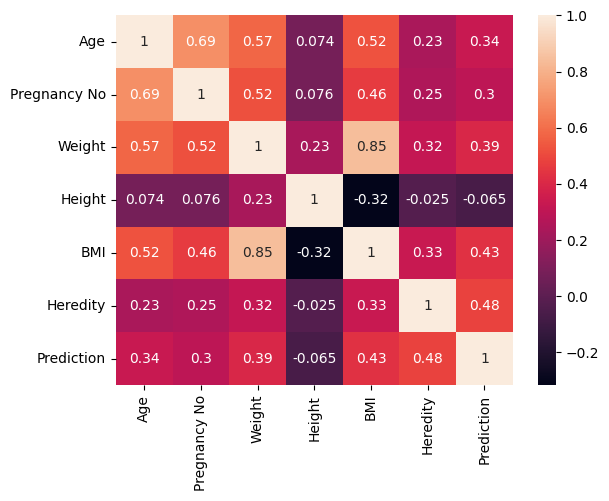

In [78]:
# Compute the correlation matrix for the numerical columns in the dataset. Identify the most strongly correlated pairs of features 
# and interpret the results.

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [113]:
# Unstack the correlation matrix
correlation_pairs = correlation_matrix.unstack()

# Sort the correlation pairs by absolute value in descending order
sorted_pairs = correlation_pairs.abs().sort_values(kind="quicksort", ascending=False)

# Remove the correlation of each feature with itself (which is always 1)
strongest_pairs = sorted_pairs[sorted_pairs != 1]

# Display the top pairs
print(strongest_pairs.head(10))  # Displaying top 10 strongly correlated pairs


BMI           Weight          0.845383
Weight        BMI             0.845383
Age           Pregnancy No    0.694880
Pregnancy No  Age             0.694880
Weight        Age             0.574599
Age           Weight          0.574599
              BMI             0.524466
BMI           Age             0.524466
Weight        Pregnancy No    0.517925
Pregnancy No  Weight          0.517925
dtype: float64


In [119]:
# Group the data by 'Age Group' and calculate the mean, median, and standard deviation for 'BMI' and 'Weight'.
# How do these statistics vary across different age groups?
data.groupby('Age Group')[['BMI', 'Weight']].agg(['mean', 'median', 'std'])


BMI                      Weight                  
                  mean median       std       mean median        std
Age Group                                                           
Middle-aged  28.631831   28.4  4.308194  72.163380   70.0   9.489888
Senior       32.133210   32.0  4.194733  80.771218   81.0  10.038780
Young        26.458647   26.3  3.914089  64.996241   64.0   9.894347

In [136]:
# Filter the dataset to find the records where the 'Prediction' is positive, and the 'BMI' is above the 75th percentile 
# for their respective 'Age Group'. How many such records are there, and what is their distribution across 'Pregnancy No'?

# BMI_75th_Percentile = data.groupby('Age Group')['BMI'].quantile(0.75)
# data = data.merge(BMI_75th_Percentile.rename('BMI_75th_Percentile'), on='Age Group')
# data[(data['Prediction']>0) & (data['BMI']>BMI_75th_Percentile)]

In [139]:
# Create a new column called 'Risk Factor' by combining 'BMI' and 'Heredity' using a weighted sum (e.g., 0.7 * BMI + 0.3 * Heredity).
# Then, group by 'Age Group' and 'Pregnancy No' to find the average 'Risk Factor'. What insights can you derive from this new feature?
data['Risk Factor'] = 0.7 * data['BMI'] + 0.3 * data['Heredity']
data.groupby(['Age Group', 'Pregnancy No']).mean('Risk Factor')

Age     Weight      Height        BMI  \
Age Group   Pregnancy No                                                
Middle-aged 1.0           29.319444  69.833333  160.236111  27.366667   
            2.0           29.967742  70.451613  158.322581  28.296774   
            3.0           30.582278  73.949367  159.025316  29.322785   
            4.0           30.775000  77.800000  160.775000  30.235000   
            5.0           30.500000  81.500000  162.500000  30.800000   
            6.0           32.500000  80.000000  156.750000  32.500000   
            7.0           34.000000  70.000000  156.000000  28.800000   
Senior      1.0           37.500000  76.833333  162.666667  28.950000   
            2.0           37.300000  73.900000  157.850000  29.715000   
            3.0           38.121622  81.040541  158.756757  32.247297   
            4.0           39.084507  80.704225  159.295775  31.880282   
            5.0           40.542857  85.000000  157.771429  34.182857   
            6.0           39.960000  80.640000  156.800000  32.808000   
            7.0           41.000000  86.600000  161.000000  33.606667   
            8.0           43.000000  90.000000  164.000000  33.566667   
            9.0           44.500000  92.500000  157.500000  37.300000   
Young       1.0           21.561798  63.275281  156.146067  26.020225   
            2.0           23.120000  67.986667  158.240000  27.202667   
            3.0           22.727273  71.818182  159.090909  28.427273   
            4.0           23.500000  68.500000  160.000000  26.750000   

                          Heredity  Prediction  BMI_75th_Percentile  \
Age Group   Pregnancy No                                              
Middle-aged 1.0           0.194444    0.166667                 31.4   
            2.0           0.167742    0.141935                 31.4   
            3.0           0.291139    0.253165                 31.4   
            4.0           0.225000    0.200000                 31.4   
            5.0           0.250000    0.000000                 31.4   
            6.0           0.250000    0.250000                 31.4   
            7.0           0.000000    0.000000                 31.4   
Senior      1.0           0.166667    0.000000                 35.6   
            2.0           0.225000    0.250000                 35.6   
            3.0           0.337838    0.405405                 35.6   
            4.0           0.352113    0.352113                 35.6   
            5.0           0.514286    0.571429                 35.6   
            6.0           0.480000    0.520000                 35.6   
            7.0           0.466667    0.466667                 35.6   
            8.0           0.333333    1.000000                 35.6   
            9.0           1.000000    0.500000                 35.6   
Young       1.0           0.095506    0.078652                 28.8   
            2.0           0.160000    0.066667                 28.8   
            3.0           0.272727    0.181818                 28.8   
            4.0           1.000000    0.000000                 28.8   

                          Risk Factor  
Age Group   Pregnancy No               
Middle-aged 1.0             19.215000  
            2.0             19.858065  
            3.0             20.613291  
            4.0             21.232000  
            5.0             21.635000  
            6.0             22.825000  
            7.0             20.160000  
Senior      1.0             20.315000  
            2.0             20.868000  
            3.0             22.674459  
            4.0             22.421831  
            5.0             24.082286  
            6.0             23.109600  
            7.0             23.664667  
            8.0             23.596667  
            9.0             26.410000  
Young       1.0             18.242809  
            2.0             19.089867  
            3.0             19.980909  
            4.0       

In [140]:
# Detect outliers in the 'Weight' and 'Height' columns using the Z-score method or the IQR method. 
# How many outliers are present, and do they correspond to any specific 'Age Group' or 'Prediction'?

In [153]:
# Analyze the distribution of 'Prediction' values across different 'Age Group' and 'Heredity' levels. 
# Are there any significant trends or patterns that emerge?
df = data.groupby(['Age Group', 'Heredity'])['Prediction'].sum().reset_index()
df

,Age Group,Heredity,Prediction
0,Middle-aged,0,17
1,Middle-aged,1,46
2,Senior,0,44
3,Senior,1,65
4,Young,0,12
5,Young,1,9


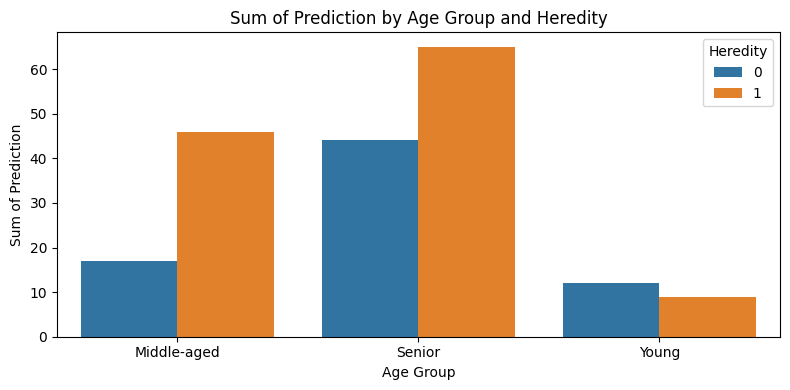

In [155]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Age Group', y='Prediction', hue='Heredity', data=df)
plt.title('Sum of Prediction by Age Group and Heredity')
plt.xlabel('Age Group')
plt.ylabel('Sum of Prediction')
plt.xticks(rotation=0)
plt.legend(title='Heredity')
plt.tight_layout()
plt.show()

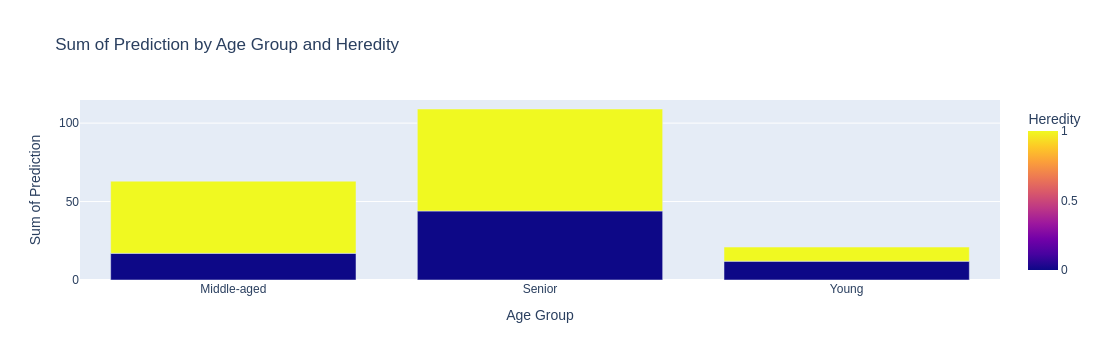

In [156]:
fig = px.bar(df, x='Age Group', y='Prediction', color='Heredity', barmode='group',
             labels={'Prediction': 'Sum of Prediction'},
             title='Sum of Prediction by Age Group and Heredity')

# Customize layout
fig.update_layout(xaxis_title='Age Group', yaxis_title='Sum of Prediction')

# Show the plot
fig.show()

In [157]:
# Normalize the 'Weight' and 'Height' columns using Min-Max scaling and Standardization. Compare the effect of 
# these two techniques on the dataset. Which scaling method is more suitable for your data, and why?

In [164]:
# Create a pivot table with 'Age Group' as rows and 'Prediction' as columns, and aggregate by the count of records. 
# What does the pivot table reveal about the relationship between 'Age Group' and 'Prediction'?
pd.pivot_table(data, columns='Prediction', index='Age Group', aggfunc='size').reset_index()

Prediction,Age Group,0,1
0,Middle-aged,292,63
1,Senior,162,109
2,Young,245,21


In [ ]:
# Plot a heatmap of the correlation matrix of the dataset. Additionally, create a pairplot to visualize 
# the relationships between 'Age', 'BMI', 'Weight', and 'Height'. What do these visualizations tell you about the dataset?
correlation_matrix = data['Age', 'BMI', 'Weight', 'Height'].corr()
